In [32]:
from itertools import combinations
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
def frequent_itemsets(transactions, k):

    # Creación de diccionario para almacenar el conteo de cada conjunto de artículos
    dic_conteo = defaultdict(int)

    # Para obtener el conjunto de todos los artículos
    articulos = set(articulo for transaccion in transactions for articulo in transaccion) # O (n²)

    for tam_subcon in range(2, len(articulos)+1):
        #Generar todos los subconjuntos de longitud tam_subcon
        for transaccion in transactions:
            for subconjunto in combinations(transaccion, tam_subcon):
                dic_conteo[frozenset(subconjunto)] += 1                 # O(n³)

    # Para seleccionar solo los subconjuntos que aparecen al menos "K" veces
    resultado = [set(conjunto) for conjunto, conteo in dic_conteo.items() if conteo >= k]

    return resultado





### Complejidad Temporal Total
La complejidad temporal total es O(T * m^k), donde:
- **T** es el número de transacciones,
- **m** es el tamaño promedio de cada transacción,
- **k** es el tamaño máximo de los subconjuntos considerados.

### Complejidad Espacial
- **Diccionario `dic_conteo`**: El diccionario `dic_conteo` almacena un conteo para cada subconjunto de artículos de las transacciones. La cantidad de subconjuntos es el número de combinaciones posibles de los artículos, lo cual depende de **T** (número de transacciones) y el tamaño de las transacciones (**m**). Esto puede llevar a un número de subconjuntos en el orden de O(T * m^k).

- **Resultado `resultado`**: La lista `resultado` almacenará los subconjuntos frecuentes, y su tamaño dependerá de cuántos subconjuntos cumplen con la condición de ser frecuentes (aparecer al menos `k` veces). En el peor caso, puede ser O(T * m^k), ya que todos los subconjuntos podrían ser frecuentes.

### Complejidad Espacial Total
La complejidad espacial es O(T * m^k), debido a:
- El diccionario `dic_conteo`, que almacena cada subconjunto y su conteo,
- La lista `resultado`, que almacena los subconjuntos frecuentes.


In [34]:
def construir_grafo_coocurrencia(transacciones, k):
    # Diccionario para contar la co-ocurrencia entre cada par de artículos
    conteo_coocurrencia = defaultdict(int)

    # Contar co-ocurrencias de pares de artículos en las transacciones
    for transaccion in transacciones:
        for articulo1, articulo2 in combinations(transaccion, 2):
            conteo_coocurrencia[frozenset([articulo1, articulo2])] += 1

    # Grafo de co-ocurrencia
    grafo_coocurrencia = defaultdict(set)

    # Crear aristas en el grafo para pares de artículos que cumplen con el umbral k
    for par, conteo in conteo_coocurrencia.items():
        if conteo >= k:
            articulo1, articulo2 = list(par)
            grafo_coocurrencia[articulo1].add(articulo2)
            grafo_coocurrencia[articulo2].add(articulo1)

    return grafo_coocurrencia

### Complejidad de la función `construir_grafo_coocurrencia`

La función `construir_grafo_coocurrencia` realiza los siguientes pasos:

1. **Contar co-ocurrencias de pares de artículos:**
   - Itera sobre todas las transacciones y genera todos los pares posibles de artículos con `combinations(transaccion, 2)`. Si hay `T` transacciones y cada transacción tiene un promedio de `N` artículos, el número de combinaciones por transacción es `O(N^2)`.
   - En total, se generan `O(T * N^2)` combinaciones y se actualizan los conteos de co-ocurrencia.

2. **Crear el grafo de co-ocurrencia:**
   - Se itera sobre todos los pares de artículos en el diccionario `conteo_coocurrencia`, que tiene como máximo `O(N^2)` pares si todos los artículos son únicos.
   - Para cada par, se realiza una comparación para ver si el conteo es mayor o igual a `k`. La operación de inserción en el conjunto tiene complejidad `O(1)` en promedio.

### Complejidad total:
- **Tiempo:**
  - La complejidad de contar las co-ocurrencias es `O(T * N^2)`, donde `T` es el número de transacciones y `N` es el número promedio de artículos por transacción.
  - La complejidad de crear el grafo es `O(N^2)` debido a la iteración sobre los pares de artículos.



In [35]:
def encontrar_comunidades(grafo):
    # Conjunto para llevar registro de nodos visitados
    visitados = set()
    comunidades = []

    # Función auxiliar para DFS
    def dfs(nodo, comunidad):
        # Marcar el nodo como visitado y añadirlo a la comunidad actual
        visitados.add(nodo)
        comunidad.append(nodo)
        # Recorrer nodos adyacentes
        for vecino in grafo[nodo]:
            if vecino not in visitados:
                dfs(vecino, comunidad)

    # Encontrar todos los componentes conectados
    for nodo in grafo:
        if nodo not in visitados:
            comunidad = []
            dfs(nodo, comunidad)
            comunidades.append(comunidad)

    return comunidades

### Complejidad de la función `encontrar_comunidades`

La función `encontrar_comunidades` realiza los siguientes pasos:

1. **DFS (Búsqueda en Profundidad) para encontrar componentes conectados:**
   - Para cada nodo en el grafo, si no ha sido visitado, se llama a la función `dfs` para recorrer todos los nodos conectados a él y formar una comunidad.
   - La función `dfs` recorre todos los vecinos del nodo y marca cada uno como visitado, asegurando que no se visite el mismo nodo más de una vez.
   - El tiempo necesario para recorrer un nodo y sus vecinos es proporcional al número de aristas del grafo.

### Complejidad total:
- **Tiempo:**
  - La complejidad de la DFS es `O(N + E)`, donde `N` es el número de nodos (vértices) y `E` es el número de aristas en el grafo.
  - Cada nodo y cada arista se visitan exactamente una vez durante el proceso.



In [36]:
transacciones = [
    {"leche", "pan", "huevos", "cereal", "jugo"},
    {"leche", "pan", "huevos"},
    {"leche", "jugo", "cereal"},
    {"cereal", "jugo", "mantequilla", "pan"},
    {"huevos", "pan", "jugo"},
    {"leche", "huevos", "jugo"},
    {"pan", "mantequilla", "miel"},
    {"leche", "pan", "huevos", "miel"},
    {"cereal", "jugo", "pan"},
    {"leche", "pan", "huevos", "cereal", "jugo"},
    {"miel", "cereal", "jugo"},
    {"leche", "mantequilla", "huevos", "pan"},
    {"miel", "huevos", "pan"},
    {"cereal", "leche", "miel"},
    {"jugo", "huevos", "pan"},
    {"pan", "jugo", "huevos", "leche"},
    {"cereal", "leche", "huevos", "miel"},
    {"leche", "jugo", "cereal", "miel"},
    {"pan", "jugo", "huevos", "leche", "miel"},
    {"huevos", "mantequilla", "pan"},
    {"cereal", "pan", "jugo"},
    {"leche", "pan", "huevos", "cereal"},
    {"mantequilla", "pan", "cereal"},
    {"miel", "cereal", "jugo", "pan"},
    {"huevos", "pan", "leche", "cereal"},
    {"pan", "jugo", "huevos"},
    {"cereal", "mantequilla", "miel", "pan"},
    {"leche", "miel", "jugo"},
    {"pan", "jugo", "leche", "miel"},
    {"huevos", "jugo", "pan", "miel"},

    {"pasta", "salsa", "queso"},
    {"aceite", "pasta", "pan"},
    {"pasta", "aceite", "ajo"},
    {"salsa", "queso", "aceitunas"},
    {"aceitunas", "pan", "ajo"},
    {"pasta", "aceitunas"},
    {"salsa", "queso", "ajo"},
    {"pasta", "aceite", "aceitunas"},
    {"queso", "aceite"},
    
    {"agua", "refresco", "botella"},
    {"botella", "jugos", "agua"},
    {"refresco", "hielo", "limón"},
    {"agua", "botella"},
    {"jugos", "hielo"},
    {"refresco", "hielo", "limón"},
    {"botella", "agua", "refresco"},
    {"limón", "refresco"},
    {"agua", "jugos"},

     {"zapatos", "pantalones", "camisa"},
    {"chaqueta", "pantalones", "bufanda"},
    {"sombrero", "zapatos", "camisa"},
    {"bufanda", "zapatos", "pantalones"},
    {"chaqueta", "bufanda", "zapatos"},
    {"sombrero", "chaqueta", "bufanda"},
    {"pantalones", "sombrero", "zapatos"},
    {"camisa", "chaqueta", "zapatos"},
    {"sombrero", "camisa", "bufanda"},
    {"camisa", "pantalones", "bufanda"}
]


In [37]:
k = 3

In [38]:
frequent_itemsets(transacciones, k)

[{'huevos', 'pan'},
 {'jugo', 'pan'},
 {'leche', 'pan'},
 {'cereal', 'pan'},
 {'huevos', 'jugo'},
 {'huevos', 'leche'},
 {'cereal', 'huevos'},
 {'jugo', 'leche'},
 {'cereal', 'jugo'},
 {'cereal', 'leche'},
 {'mantequilla', 'pan'},
 {'cereal', 'mantequilla'},
 {'miel', 'pan'},
 {'huevos', 'miel'},
 {'leche', 'miel'},
 {'jugo', 'miel'},
 {'cereal', 'miel'},
 {'queso', 'salsa'},
 {'aceite', 'pasta'},
 {'agua', 'botella'},
 {'limón', 'refresco'},
 {'camisa', 'zapatos'},
 {'pantalones', 'zapatos'},
 {'bufanda', 'chaqueta'},
 {'bufanda', 'pantalones'},
 {'huevos', 'jugo', 'pan'},
 {'huevos', 'leche', 'pan'},
 {'cereal', 'huevos', 'pan'},
 {'jugo', 'leche', 'pan'},
 {'cereal', 'jugo', 'pan'},
 {'cereal', 'leche', 'pan'},
 {'huevos', 'jugo', 'leche'},
 {'cereal', 'huevos', 'leche'},
 {'cereal', 'jugo', 'leche'},
 {'cereal', 'mantequilla', 'pan'},
 {'huevos', 'leche', 'miel'},
 {'huevos', 'miel', 'pan'},
 {'leche', 'miel', 'pan'},
 {'cereal', 'jugo', 'miel'},
 {'cereal', 'leche', 'miel'},
 {'ju

In [39]:
coocurrencia = construir_grafo_coocurrencia(transacciones, k)
coocurrencia

defaultdict(set,
            {'pan': {'cereal',
              'huevos',
              'jugo',
              'leche',
              'mantequilla',
              'miel'},
             'huevos': {'cereal', 'jugo', 'leche', 'miel', 'pan'},
             'jugo': {'cereal', 'huevos', 'leche', 'miel', 'pan'},
             'leche': {'cereal', 'huevos', 'jugo', 'miel', 'pan'},
             'cereal': {'huevos',
              'jugo',
              'leche',
              'mantequilla',
              'miel',
              'pan'},
             'mantequilla': {'cereal', 'pan'},
             'miel': {'cereal', 'huevos', 'jugo', 'leche', 'pan'},
             'salsa': {'queso'},
             'queso': {'salsa'},
             'pasta': {'aceite'},
             'aceite': {'pasta'},
             'agua': {'botella'},
             'botella': {'agua'},
             'limón': {'refresco'},
             'refresco': {'limón'},
             'camisa': {'zapatos'},
             'zapatos': {'camisa', 'pantalones'},
    

In [40]:
grafo = nx.Graph()

In [41]:
for nodo, vecinos in coocurrencia.items():
    for vecino in vecinos:
        grafo.add_edge(nodo, vecino)

/tmp/ipykernel_581273/425647737.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


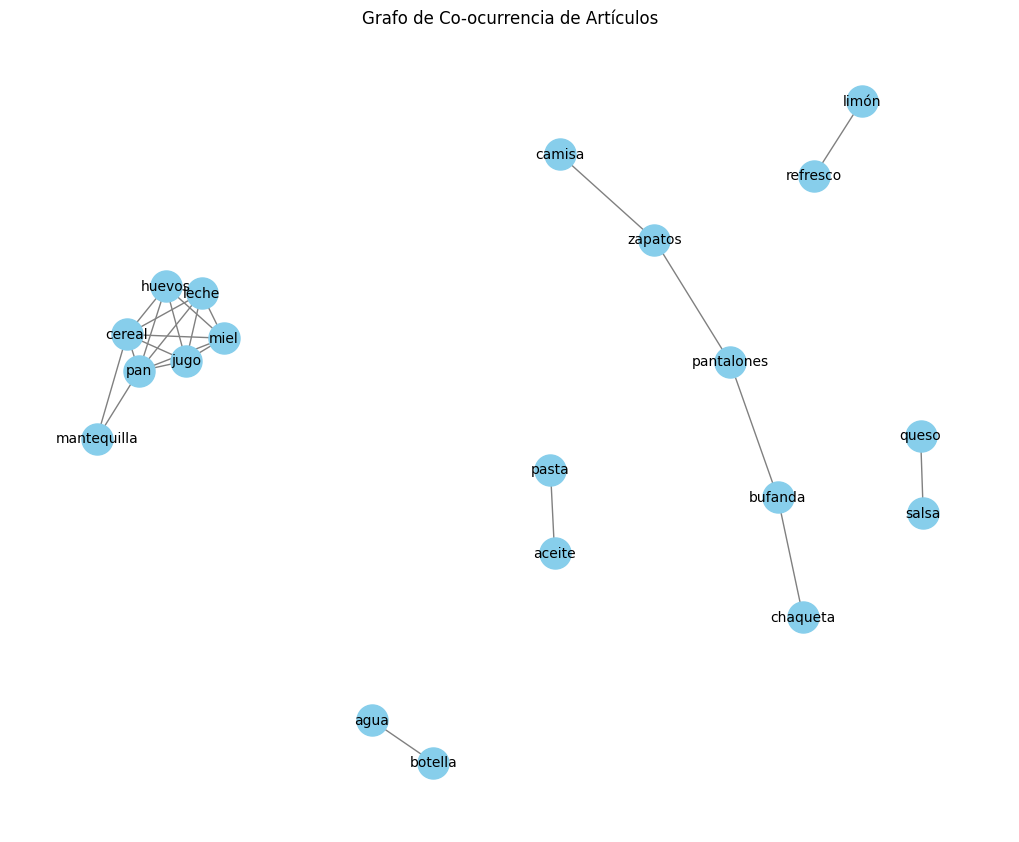

In [42]:
plt.figure(figsize=(10, 8), facecolor='white')
pos = nx.spring_layout(grafo, k= 0.5)  
nx.draw(grafo, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Grafo de Co-ocurrencia de Artículos",color='black' )
plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
encontrar_comunidades(grafo)

[['pan', 'mantequilla', 'cereal', 'huevos', 'miel', 'jugo', 'leche'],
 ['salsa', 'queso'],
 ['pasta', 'aceite'],
 ['agua', 'botella'],
 ['limón', 'refresco'],
 ['camisa', 'zapatos', 'pantalones', 'bufanda', 'chaqueta']]